In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score


In [2]:
from sklearn.datasets import make_moons

# Generate non-linear dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 140, Testing samples: 60


In [3]:
# Linear SVM
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

# Predict
y_pred_linear = linear_svm.predict(X_test)
print(f"Linear SVM Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")


Linear SVM Accuracy: 0.83


In [4]:
# Non-linear SVM (RBF Kernel)
rbf_svm = SVC(kernel='rbf', C=1, gamma=0.5)
rbf_svm.fit(X_train, y_train)

# Predict
y_pred_rbf = rbf_svm.predict(X_test)
print(f"RBF SVM Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")


RBF SVM Accuracy: 0.97


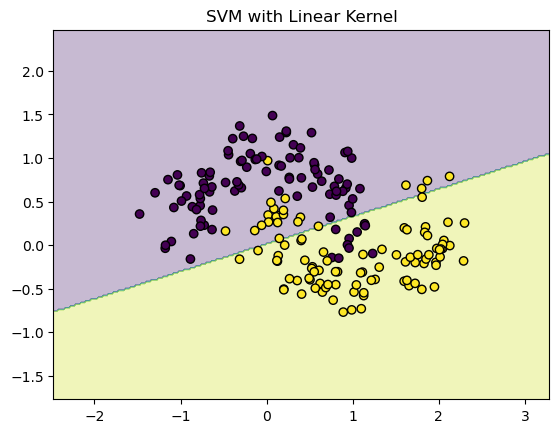

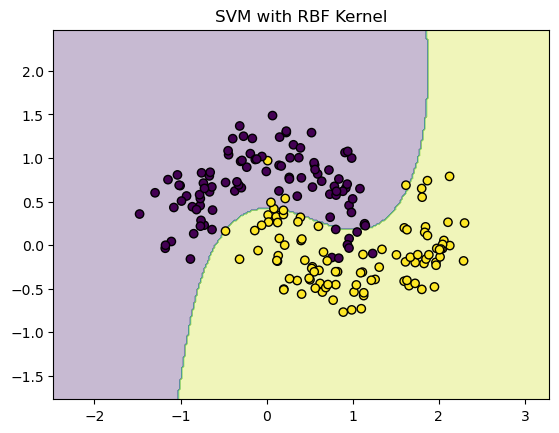

In [5]:
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(linear_svm, X, y, "SVM with Linear Kernel")
plot_decision_boundary(rbf_svm, X, y, "SVM with RBF Kernel")


In [6]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")
print(f"Best CV Score: {grid.best_score_:.2f}")


Best Parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
Best CV Score: 0.96


In [7]:
# Evaluate best model with cross-validation
best_svm = grid.best_estimator_
scores = cross_val_score(best_svm, X, y, cv=5)

print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.2f}")


Cross-Validation Scores: [1.    0.95  0.975 0.975 0.95 ]
Mean CV Accuracy: 0.97
